<a href="https://colab.research.google.com/github/sbogde/scikit-regressions-and-confessions/blob/main/2382432_Task1_Algo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import math
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import plot_tree

In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [52]:
# Check if running in Google Colab
if 'google.colab' in str(get_ipython()):
    from google.colab import drive, data_table
    drive.mount('/content/drive')
    file_path = '/content/drive/My Drive/Colab Notebooks/kc_house_data.csv'
    data_table.enable_dataframe_formatter()
else:
    file_path = './kc_house_data.csv'  # Local path

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
data = pd.read_csv(file_path)

In [54]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,condition
0,221900.0,3,1.00,1180,5650,1.0,7,1180,0,1955,0,47.5112,-122.257,1340,5650,3
1,538000.0,3,2.25,2570,7242,2.0,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,3
2,180000.0,2,1.00,770,10000,1.0,6,770,0,1933,0,47.7379,-122.233,2720,8062,3
3,604000.0,4,3.00,1960,5000,1.0,7,1050,910,1965,0,47.5208,-122.393,1360,5000,5
4,510000.0,3,2.00,1680,8080,1.0,8,1680,0,1987,0,47.6168,-122.045,1800,7503,3


In [55]:
# Check and handle missing values:
data.isnull().sum()

,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
grade,0
sqft_above,0
sqft_basement,0
yr_built,0


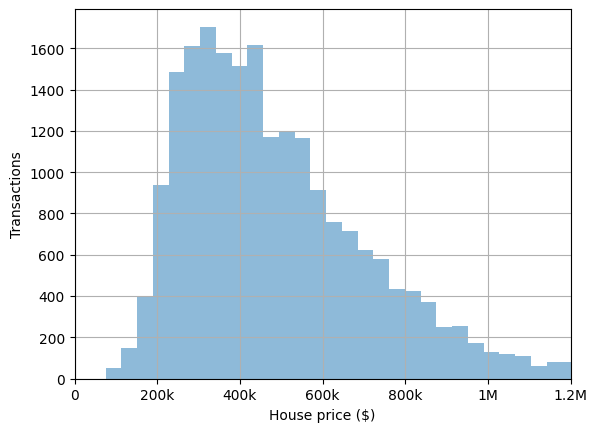

In [56]:
# Histogram of sale prices
plt.hist(data['price'], bins=200, alpha=0.5)
plt.grid()
plt.xlabel('House price ($)')
plt.ylabel('Transactions')
plt.xticks(ticks=[0, 200000, 400000, 600000, 800000, 1000000, 1200000],
           labels=['0', '200k', '400k', '600k', '800k', '1M', '1.2M'])

plt.xlim(0,1200000)
plt.show()

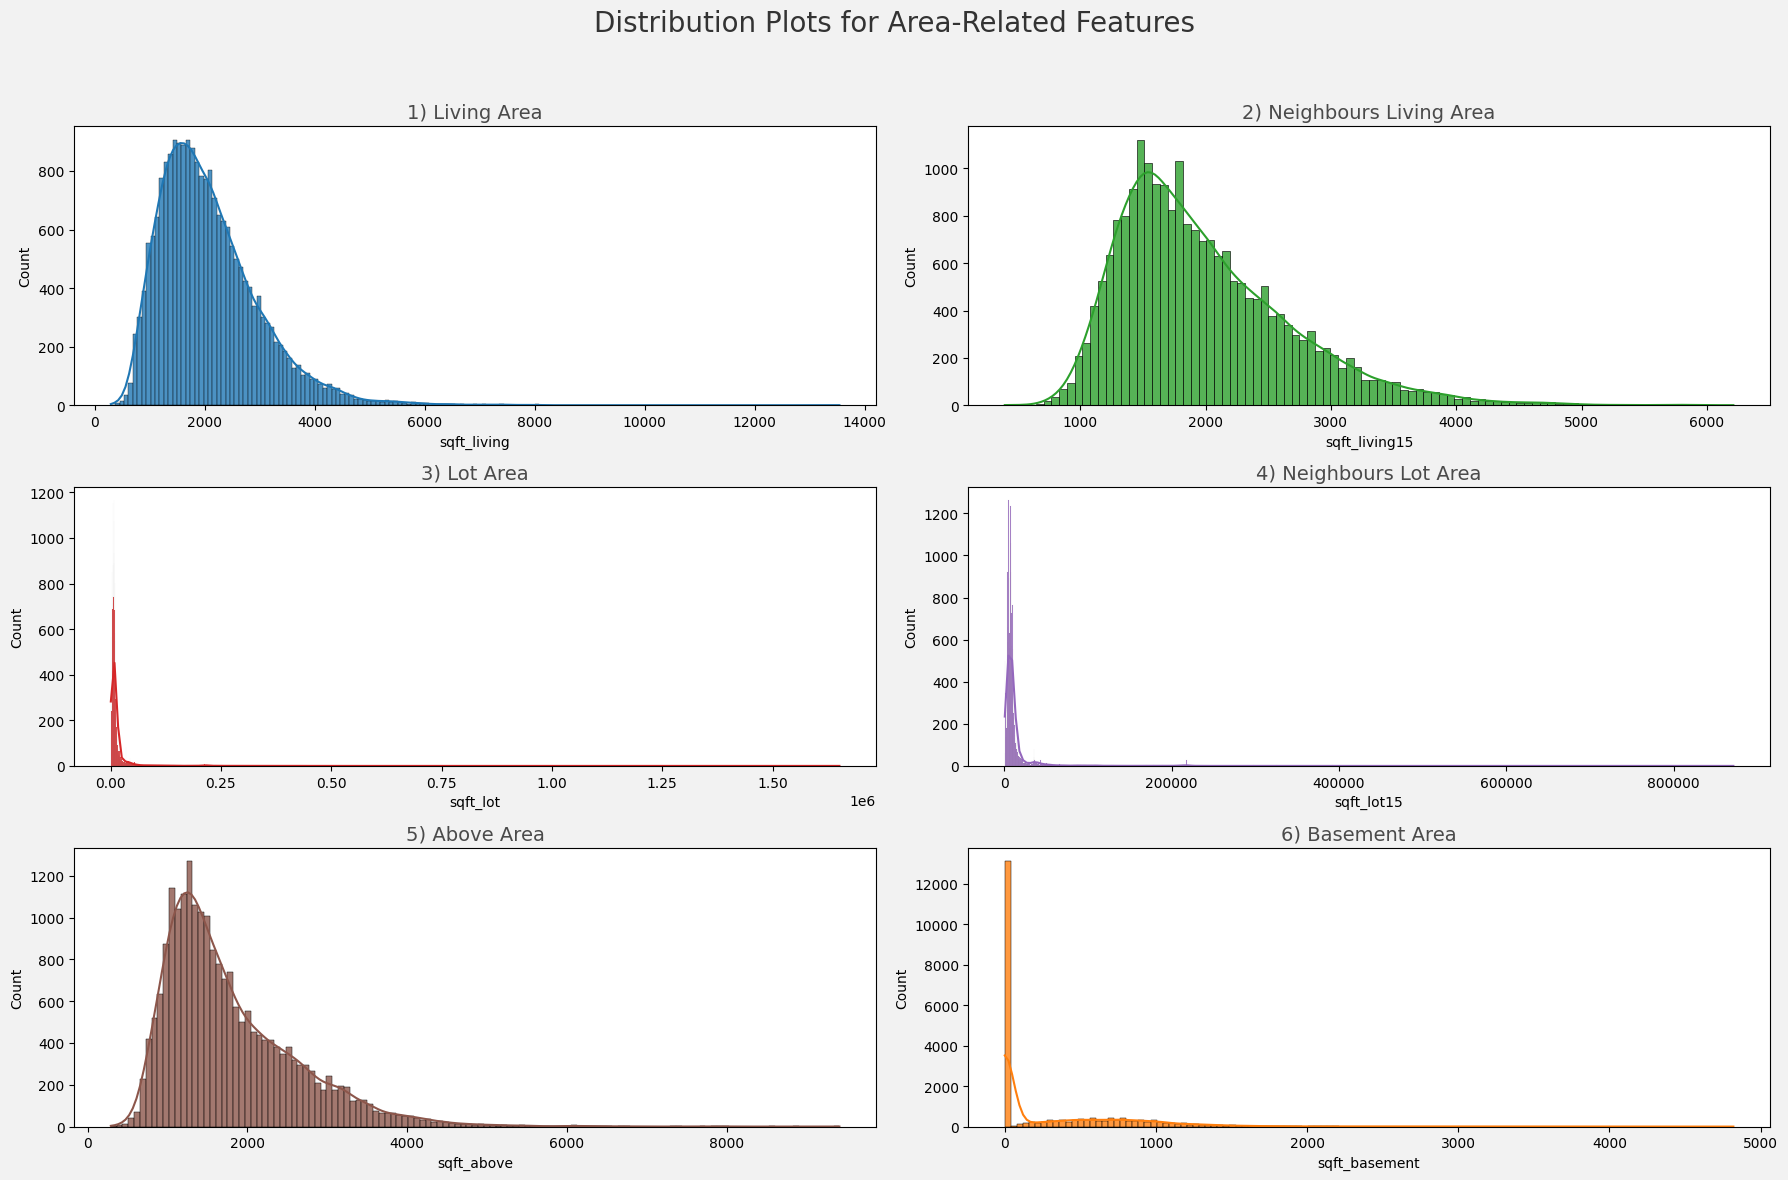

In [57]:
# Define groups of columns based on their characteristics
columns_area = ['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_above', 'sqft_basement']
columns_year = ['yr_renovated', 'yr_built']
columns_room = ['bathrooms', 'bedrooms', 'floors']
columns_rate = ['grade', 'view', 'waterfront', 'condition']
titles_area = ['Living Area', 'Neighbours Living Area', 'Lot Area', 'Neighbours Lot Area', 'Above Area', 'Basement Area']
titles_year = ['Renovated Year', 'Built Year']
titles_rate = ['Grade Rate', 'View Rate', 'Waterfront Rate', 'Condition Rate']

# Colour palette for visualisation
my_colors = ['#FF7F0E', '#1F77B4', '#2CA02C', '#D62728', '#9467BD', '#8C564B']

# Set the columns and titles for plotting (e.g., for area-related features)
columns = columns_area
titles = titles_area

# Calculate the number of columns and rows for the subplots
num_cols = len(columns)
num_rows = math.ceil(num_cols / 2)  # Arrange subplots in two rows for better readability

# Create a figure for the subplots
plt.figure(figsize=(18, 12), facecolor='#F2F2F2')  # Light grey background for better contrast

# Loop through each feature in the group and plot its distribution
for i, (column, title) in enumerate(zip(columns, titles), 1):
    plt.subplot(int(num_rows), 2, i)  # Create a subplot for each feature
    plt.title(f'{i}) {title}', color='#4A4A4A', fontsize=14)  # Add title with dark grey text
    sns.histplot(data[column], kde=True, color=my_colors[i % len(my_colors)], alpha=0.8)  # Add histogram with smooth curve

# Add a main title for the entire figure
plt.suptitle('Distribution Plots for Area-Related Features', color='#333333', size=20)

# Adjust layout to avoid overlapping of plots and labels
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Display the plots
plt.show()

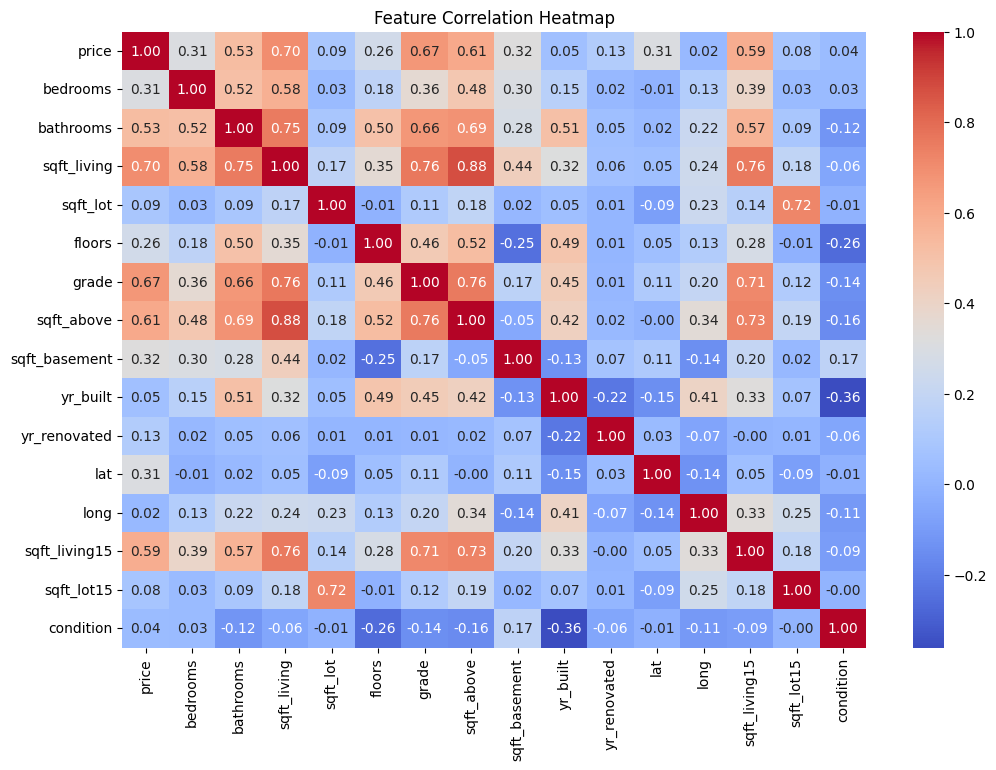

In [58]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [59]:
# Compute the correlation of all features with the target variable 'price' and sort them in descending order
# This helps identify features that have the strongest positive or negative linear relationship with 'price'
# Features with higher correlation values are more likely to contribute significantly to the model
data.corr()['price'].sort_values(ascending=False)

,price
price,1.000000
sqft_living,0.702044
grade,0.667463
sqft_above,0.605566
sqft_living15,0.585374
bathrooms,0.525134
sqft_basement,0.323837
bedrooms,0.308338
lat,0.306919
floors,0.256786


In [60]:
try:
    import plotly
except ImportError:
    # Install the library if not found
    %pip install plotly

# Importing Plotly Express for creating interactive visualisations
import plotly.express as px

# Filter the dataset to include only properties with a high grade (grade >= 9)
high_grade_properties = data[data.grade >= 9]

fig = px.scatter_mapbox(
    data_frame=high_grade_properties,
    lat='lat',
    lon='long',
    zoom=10,
    height=500,
    hover_data={'price': True, 'grade': True, 'yr_built': True},
)

# Set the map style to "open-street-map" for a clean and familiar layout
fig.update_layout(mapbox_style="open-street-map")

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [61]:
# Drop irrelevant or weakly correlated features
# SVR old code (dropped lat and long as SVR doesn't benefit from spatial data patterns)
# X = data.drop(columns=['price', 'sqft_lot', 'sqft_lot15', 'lat', 'long'])

# Retain latitude (lat) and longitude (long) as tree-based models like DTR can potentially
# capture spatial relationships between these features and the target variable.
# TODO: Evaluate feature importance using model.feature_importances_ after fitting
# to confirm if lat and long are useful predictors.
X = data.drop(columns=['price', 'sqft_lot', 'sqft_lot15'])  # Dropping weakly correlated features

# Define target variable
y = data['price']  # House price is the target for prediction

In [62]:
# One-Hot Encode categorical columns
# SVR old code: Dropped the first category to avoid multicollinearity
# X = pd.get_dummies(X, columns=['condition', 'grade'], drop_first=True)

# Tree-based models like DTR are less sensitive to multicollinearity introduced by one-hot encoding.
# Keeping all categories (without drop_first=True) can improve interpretability of feature importance.
X = pd.get_dummies(X, columns=['condition', 'grade'])

# Check the resulting dataset after one-hot encoding
X.head()

,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,3,1.00,1180,1.0,1180,0,1955,0,47.5112,-122.257,...,False,False,False,True,False,False,False,False,False,False
1,3,2.25,2570,2.0,2170,400,1951,1991,47.7210,-122.319,...,False,False,False,True,False,False,False,False,False,False
2,2,1.00,770,1.0,770,0,1933,0,47.7379,-122.233,...,False,False,True,False,False,False,False,False,False,False
3,4,3.00,1960,1.0,1050,910,1965,0,47.5208,-122.393,...,False,False,False,True,False,False,False,False,False,False
4,3,2.00,1680,1.0,1680,0,1987,0,47.6168,-122.045,...,False,False,False,False,True,False,False,False,False,False


In [63]:
# ======================================================
# !!! WARNING: Overfitting and Misleading Evaluation !!!
# ======================================================
# The following implementation trains and tests the DecisionTreeRegressor
# on the same dataset (X, y), which leads to overfitting. This approach
# produces an inflated and misleading R² score (close to 100%) because the
# model memorises the data instead of generalising to unseen data.
#
# While it demonstrates how overfitting occurs, this is NOT the correct
# way to evaluate the model's performance. Proper evaluation requires
# splitting the data into training and testing sets, as shown below.
# Uncomment at your own risk!
#
# r_dt = DecisionTreeRegressor(random_state=0)
# r_dt.fit(X, y)
# print(f'R² score: {r2_score(y, r_dt.predict(X)) * 100:.2f}')


# =======================================
# *** OUTPUT: ***
# =======================================
# R² score: 99.91253477838828

In [64]:
# Tree-based models, such as Decision Tree Regressor (DTR), do not benefit from scaling or normalisation
# because they split data based on feature thresholds and are invariant to feature magnitudes.
# Therefore, scaling steps used in SVR can be skipped for DTR, simplifying the preprocessing pipeline.

# from sklearn.preprocessing import StandardScaler
# # Initialise separate scalers for features (X) and target (y)
# scaler_X = StandardScaler()
# scaler_y = StandardScaler()
# # Scale the feature matrix (X) as it ensures all features are on a similar scale, improving model performance
# X_scaled = scaler_X.fit_transform(X)
# # Reshaping y to 2D ensures compatibility with StandardScaler
# y_reshaped = y.values.reshape(-1, 1)
# # Scale the target variable (y)
# y_scaled = np.ravel(scaler_y.fit_transform(y_reshaped))

In [65]:
# Split data into 80% training and 20% testing, and use 'random_state=42' for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Perform hyperparameter tuning using GridSearchCV for DecisionTreeRegressor
# Unlike SVR, tree-based models like DecisionTreeRegressor are computationally efficient
# and can handle hyperparameter tuning with a broader search space in a reasonable timeframe.

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'random_state': [0, 5, 6, 7, 10, 22],  # Explore a range of random states for reproducibility
    'max_depth': [None, 5, 6, 8, 10],  # Test different depths to balance underfitting and overfitting
    'max_features': [None, 3, 10, 14]  # Control the number of features considered at each split
}

# Initialize the DecisionTreeRegressor
dtr = DecisionTreeRegressor()

# Initialize GridSearchCV
# GridSearchCV systematically evaluates all combinations of the hyperparameters in param_grid
# with 5-fold cross-validation for better generalisation and performance estimation.
dtr_cv_model = GridSearchCV(
    estimator=dtr,
    param_grid=param_grid,
    cv=5,  # Perform 5-fold cross-validation
    n_jobs=-1,  # Use all available CPU cores for parallel processing
    verbose=2,  # Display progress during execution
    scoring='r2'  # Optimise for R², as it is a regression task
)

# Fit the GridSearchCV model
# This step trains the model using the best hyperparameter combination found during the search
dtr_cv_model.fit(X_train, y_train)

# Print the best parameters and the best score
# Display the optimal hyperparameters and corresponding R² score
print("Best Parameters: ", dtr_cv_model.best_params_)
print("Best R² Score: ", dtr_cv_model.best_score_)

# ================================
# *** OUTPUT: ***
# ================================
# Fitting 5 folds for each of 120 candidates, totalling 600 fits
# Best Parameters:  {'max_depth': 8, 'max_features': None, 'random_state': 0}
# Best R² Score:  0.7399237417095714

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Parameters:  {'max_depth': 8, 'max_features': None, 'random_state': 0}
Best R² Score:  0.7399237417095714


In [67]:
# Perform hyperparameter tuning using RandomizedSearchCV for DecisionTreeRegressor
# RandomizedSearchCV is faster than GridSearchCV as it samples a subset of hyperparameter combinations
# Note: Due to its random nature, the output at the bottom of this cell may vary  with each execution

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution for RandomizedSearchCV
# Here we use `randint` to generate random values within the specified range for `max_depth`
param_dist = {
    'random_state': [0, 5, 6, 7, 10, 22],  # Test multiple random states for reproducibility
    'max_depth': randint(3, 15),  # Randomly sample tree depths between 3 and 15
    'max_features': [None, 3, 10, 14]  # Test different numbers of features considered at each split
}

# Initialize the DecisionTreeRegressor
dtr = DecisionTreeRegressor()

# Initialize RandomizedSearchCV
# RandomizedSearchCV searches over a random subset of hyperparameter combinations and is less computationally expensive than GridSearchCV
dtr_cv_model = RandomizedSearchCV(
    estimator=dtr,
    param_distributions=param_dist,
    n_iter=10,  # Test 10 random combinations
    cv=5,  # Perform 5-fold cross-validation for robust performance estimation
    n_jobs=-1,  # Use all available CPU cores
    verbose=2,  # Display progress during execution
    scoring='r2'  # Optimise for R² as it's a regression task
)

# Fit the RandomizedSearchCV model
dtr_cv_model.fit(X_train, y_train)

# Print the best parameters and the best score
# Display the optimal hyperparameters and corresponding R² score
print("Best Parameters: ", dtr_cv_model.best_params_)
print("Best R² Score: ", dtr_cv_model.best_score_)

# ================================
# *** OUTPUT: ***
# ================================
# Fitting 5 folds for each of 10 candidates, totalling 50 fits
# Best Parameters: {'max_depth': 7, 'max_features': None, 'random_state': 10}
# Best R² Score: 0.7311450078948155


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters:  {'max_depth': 11, 'max_features': None, 'random_state': 0}
Best R² Score:  0.7205093711337351


In [68]:
# =============================================
# Manual Tuning of Hyperparameters for DTR
# =============================================

# Manually experimenting with hyperparameters to optimise the DecisionTreeRegressor.
# The goal is to compare results against those obtained with GridSearchCV for verification.

# Initial model with default parameters
# regressor = DecisionTreeRegressor() # R²: 0.6701

# Testing different random_state values
# regressor = DecisionTreeRegressor(random_state=0) # R²: 0.6793
regressor = DecisionTreeRegressor(random_state=0, max_depth=8) # R²: 0.7386 (Best score from manual tuning)

# Testing additional random_state and max_depth combinations
# regressor = DecisionTreeRegressor(random_state=5, max_depth=4) # R²: 0.6292
# regressor = DecisionTreeRegressor(random_state=6) # R²: 0.7006
# regressor = DecisionTreeRegressor(random_state=7) # R²: 0.6774
# regressor = DecisionTreeRegressor(random_state=10, max_depth=7) # R²: 0.7133
# regressor = DecisionTreeRegressor(random_state=22) # R²: 0.6648
# regressor = DecisionTreeRegressor(max_depth=8, max_features=10) # R²: 0.6602

# Note: The best manually tuned hyperparameters (random_state=0, max_depth=8) produced an R² of 0.7386.
# This aligns closely with the best parameters identified by GridSearchCV, demonstrating the reliability of the automated approach.

# Fit the model with the selected hyperparameters
regressor.fit(X_train, y_train)

# Predict on test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Dictionary of metrics
metrics = {
    "Metric": ["MAE", "MSE", "RMSE", "R²"],
    "Value": [mae, mse, rmse, r2],
    "Observations": [
        "These values appear large because the target variable 'price' is not scaled and has a wide range of values (e.g., hundreds of thousands). When interpreting these metrics, it is crucial to account for the data scale.",
        "------ IDEM MAE --------",
        "------ IBIDEM MAE --------",
        "R² is scale-independent and shows that the model explains approximately 73.87% of the variance in the target variable. Value returuned for random_state=0, max_depth=8."
    ],
    "Description": [
        "Average magnitude of errors in predictions",
        "Average squared difference between predictions and actual values",
        "Square root of MSE, in the same unit as target",
        "Explains variance in target variable (closer to 1 is better)"
    ],
}

# Convert to DataFrame and display
metrics_df = pd.DataFrame(metrics)
metrics_df.fillna("", inplace=True)
metrics_df

,Metric,Value,Observations,Description
0,MAE,1.041482e+05,These values appear large because the target v...,Average magnitude of errors in predictions
1,MSE,3.955312e+10,------ IDEM MAE --------,Average squared difference between predictions...
2,RMSE,1.988797e+05,------ IBIDEM MAE --------,"Square root of MSE, in the same unit as target"
3,R²,7.386727e-01,R² is scale-independent and shows that the mod...,Explains variance in target variable (closer t...


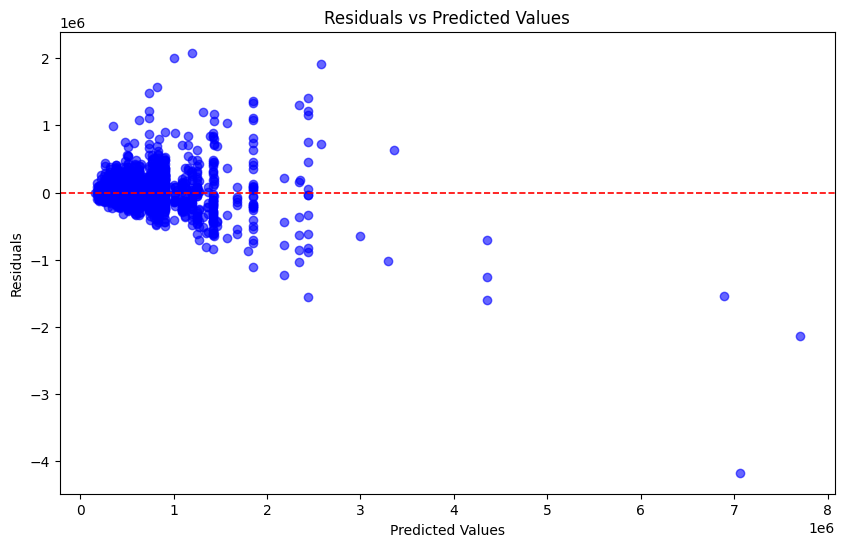

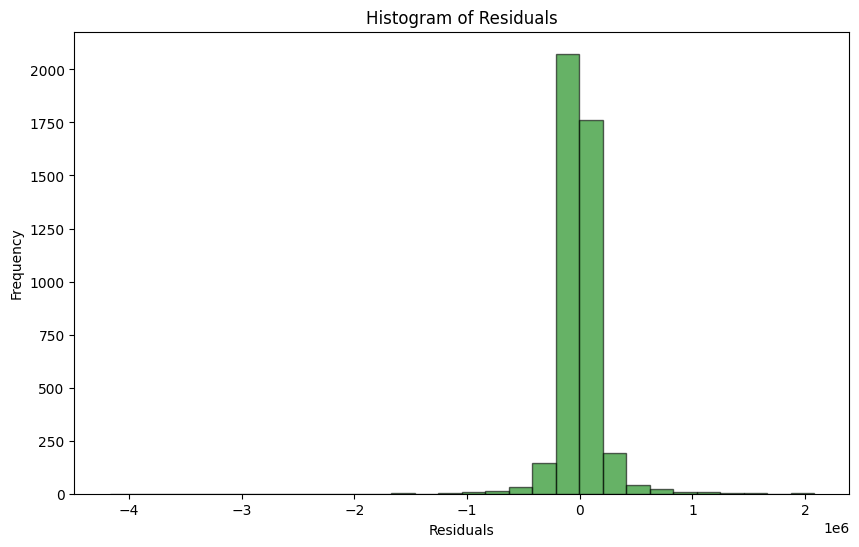

In [69]:
# Residual Analysis
# Calculate residuals
residuals = y_test - y_pred

# Plot Residuals vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color="blue")
plt.axhline(0, color='r', linestyle='--', linewidth=1.2)
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# Plot Histogram of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.6, color="green", edgecolor='black')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Comments:
# - Residuals vs Predicted Values helps check for patterns or bias in the model.
# - Histogram checks if residuals follow a normal distribution (indicating randomness).

Feature Importances:
Feature: bedrooms, Importance: 0.0009
Feature: bathrooms, Importance: 0.0028
Feature: sqft_living, Importance: 0.6145
Feature: floors, Importance: 0.0029
Feature: sqft_above, Importance: 0.0104
Feature: sqft_basement, Importance: 0.0013
Feature: yr_built, Importance: 0.0113
Feature: yr_renovated, Importance: 0.0005
Feature: lat, Importance: 0.2085
Feature: long, Importance: 0.0796
Feature: sqft_living15, Importance: 0.0522
Feature: condition_1, Importance: 0.0000
Feature: condition_2, Importance: 0.0000
Feature: condition_3, Importance: 0.0000
Feature: condition_4, Importance: 0.0006
Feature: condition_5, Importance: 0.0001
Feature: grade_1, Importance: 0.0000
Feature: grade_3, Importance: 0.0000
Feature: grade_4, Importance: 0.0000
Feature: grade_5, Importance: 0.0000
Feature: grade_6, Importance: 0.0000
Feature: grade_7, Importance: 0.0011
Feature: grade_8, Importance: 0.0008
Feature: grade_9, Importance: 0.0012
Feature: grade_10, Importance: 0.0023
Feature: grad

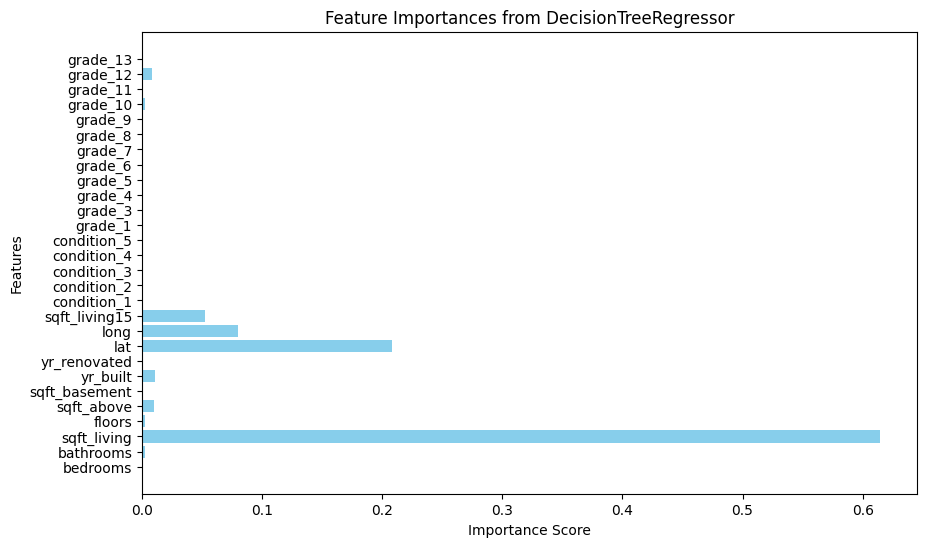

In [70]:
# Evaluate Feature Importance
# Extract and display feature importances after fitting the model
feature_importances = regressor.feature_importances_
print("Feature Importances:")
for name, importance in zip(X.columns, feature_importances):
    print(f"Feature: {name}, Importance: {importance:.4f}")

# Plot feature importances for better visualisation
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importances from DecisionTreeRegressor")
plt.show()


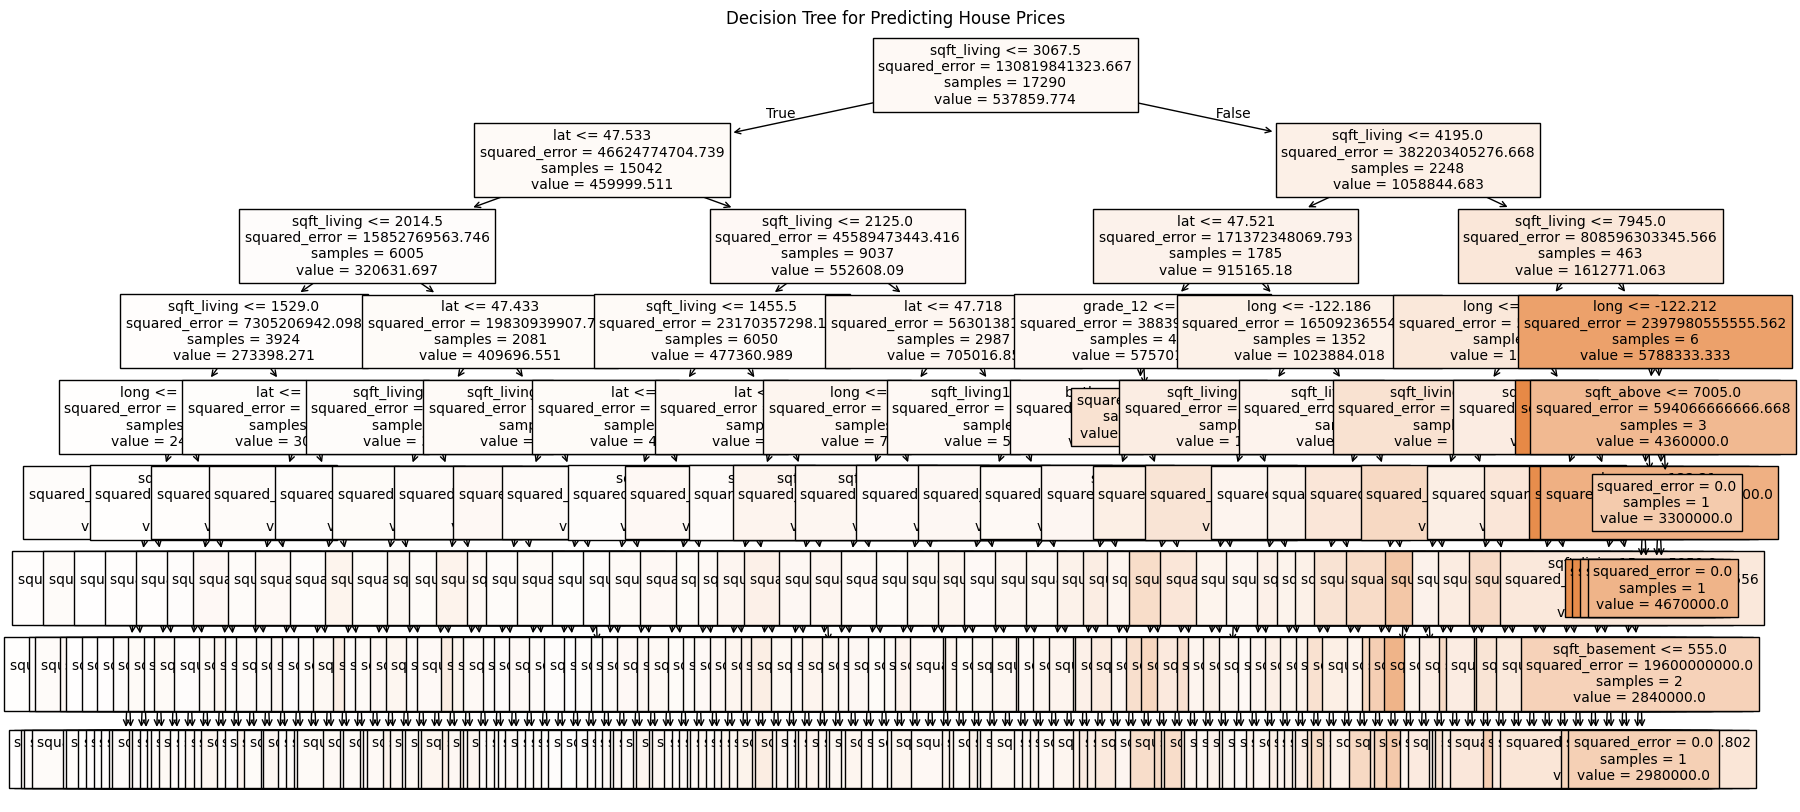

In [71]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(regressor, feature_names=X.columns, filled=True, fontsize=10)
plt.title("Decision Tree for Predicting House Prices")
plt.show()

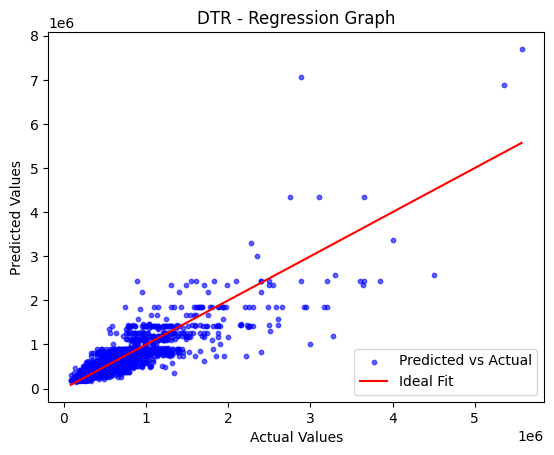

In [72]:
#Decision Tree - Regression Graph

# Predict on the test set
y_pred = regressor.predict(X_test)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color="b", alpha=0.6, s=10, label="Predicted vs Actual")

# Add a diagonal line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="r", label="Ideal Fit")

# Add labels, title, and legend
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("DTR - Regression Graph")
plt.legend(loc='lower right')
plt.show()